In [1]:
from pathlib import Path

In [2]:
# 画像ファイルのリストを取得して、並べ替える
image_paths = sorted(
    Path("datasets/floodnet/FloodNet-Supervised_v1.0/train/train-org-img").glob("*.jpg"),
    key=lambda p: int(p.stem)
)

In [3]:
len(image_paths)

1445

In [4]:
# 先頭5件のパスを確認
image_paths[:5]

[WindowsPath('datasets/floodnet/FloodNet-Supervised_v1.0/train/train-org-img/6279.jpg'),
 WindowsPath('datasets/floodnet/FloodNet-Supervised_v1.0/train/train-org-img/6287.jpg'),
 WindowsPath('datasets/floodnet/FloodNet-Supervised_v1.0/train/train-org-img/6332.jpg'),
 WindowsPath('datasets/floodnet/FloodNet-Supervised_v1.0/train/train-org-img/6334.jpg'),
 WindowsPath('datasets/floodnet/FloodNet-Supervised_v1.0/train/train-org-img/6335.jpg')]

In [5]:
from IPython.display import display
from PIL import Image

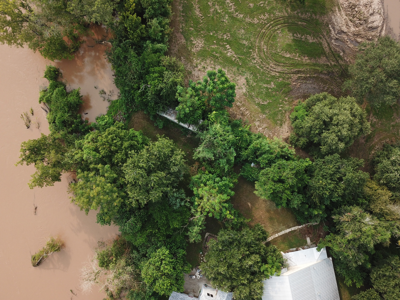

In [6]:
# 先頭の画像を表示
display(Image.open(image_paths[0]).resize((400,300)))

In [7]:
image_paths[0]

WindowsPath('datasets/floodnet/FloodNet-Supervised_v1.0/train/train-org-img/6279.jpg')

In [8]:
image_name = image_paths[0].stem

In [9]:
# 先頭の画像のカラーマスクのパスを確認
colormask_path = Path(r"datasets\floodnet\ColorMasks-FloodNetv1.0\ColorMasks-TrainSet") / f"{image_name}_lab.png"
colormask_path

WindowsPath('datasets/floodnet/ColorMasks-FloodNetv1.0/ColorMasks-TrainSet/6279_lab.png')

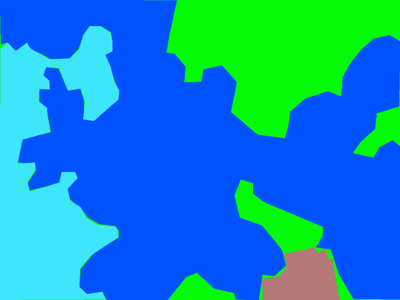

In [10]:
# 先頭の画像のカラーマスクを表示
display(Image.open(colormask_path).resize((400,300)))

In [11]:
from tqdm import tqdm

In [12]:
# 各画像のカラーマスクのピクセル値を調べてラベルを決定する関数
def label_from_colormask(image_path):
    colormask_path = Path("datasets/floodnet/ColorMasks-FloodNetv1.0/ColorMasks-TrainSet") / f"{image_path.stem}_lab.png"
    color_mask = Image.open(colormask_path).convert('RGB')
    all_pixels = list(color_mask.getdata())
    unique_colors = [str(color) for color in (set(all_pixels))]

    flood_colors = [
        (255,0,0), # building-flooded
        (160, 150, 20), # road-flooded
    ]
    is_flooded = any(str(colormask) in unique_colors for colormask in flood_colors)
    return "flooded" if is_flooded else "non-flooded"


In [13]:
# 各画像のラベルを取得
labels = []
for image_path in tqdm(image_paths):
    labels.append(label_from_colormask(image_path))

labels[:5]

100%|██████████| 1445/1445 [03:28<00:00,  6.94it/s]


['non-flooded', 'non-flooded', 'non-flooded', 'non-flooded', 'non-flooded']

In [14]:
import pandas as pd

df = pd.DataFrame({
    'image_path': [str(path) for path in image_paths],
    'label': labels
})

In [15]:
# ラベルの分布を確認
df['label'].value_counts()

label
non-flooded    1263
flooded         182
Name: count, dtype: int64

In [16]:
# ラベルを csv へ出力
df.to_csv('labels.csv', index=False)